In [109]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard

from time import time



In [110]:
# Loading the data, splitting up into test and trainign set 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print(len(train_images), len(test_images))   #checking original sizes 

In [111]:
# split training data into training and validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [112]:
#Setting class names so we can get an overview of the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

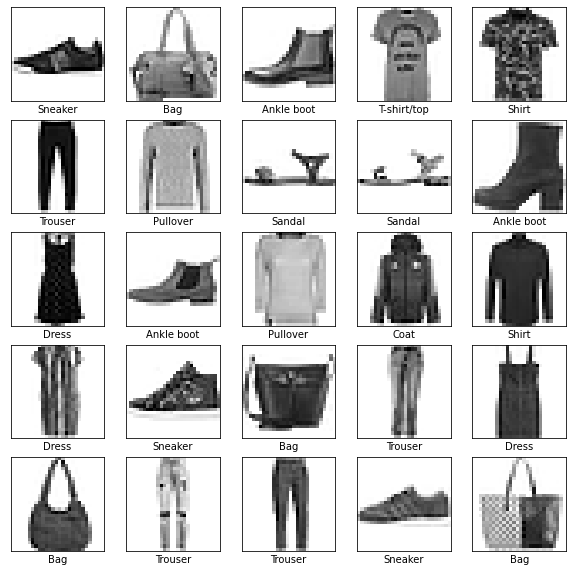

In [113]:

#Plotting a subset of data with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [114]:
#scale to range 0 - 1
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [115]:
#display some images
def display_image(position):
    image = train_images[position]
    plt.title('Example %d. Label: %s' % (position, class_names[train_labels[position]]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [116]:
#display_image(22)

In [117]:
# explore the data
print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])
print('# of test images:', test_images.shape[0])

# of training images: 48000
# of validation images: 12000
# of test images: 10000


In [118]:
print(f"Image shape before: {train_images[1].shape}")

# Pad images with 0s since we want to apply it to LeNet
train_images      = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
validation_images = np.pad(validation_images, ((0,0),(2,2),(2,2)), 'constant')
test_images       = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')

print(f"Updated Image Shape: {train_images[0].shape}.")


Image shape before: (28, 28)
Updated Image Shape: (32, 32).


In [119]:
#display_image(22)

In [120]:
#Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    #tf.keras.layers.Dropout(0.4),                       
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_14 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_15 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_7 (Flatten)         (None, 576)               0         
                                                                 
 dense_21 (Dense)            (None, 120)              

In [121]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Setting number of epochs and batch size
EPOCHS = 14
BATCH_SIZE = 128

#add channel = 1 for greyscale
train_images=train_images[:,:,:,None]
validation_images=validation_images[:,:,:,None]
#train_images.shape
validation_images.shape

X_train, y_train = train_images, to_categorical(train_labels)
X_validation, y_validation = validation_images, to_categorical(validation_labels)

print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])

# of training images: 48000
# of validation images: 12000


In [ ]:
#Fitting the model, performing training
history=model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/14
375/375 [==============================] - 20s 52ms/step - loss: 0.7941 - accuracy: 0.7339 - val_loss: 0.5998 - val_accuracy: 0.7869
Epoch 2/14
375/375 [==============================] - 19s 50ms/step - loss: 0.5501 - accuracy: 0.8171 - val_loss: 0.5100 - val_accuracy: 0.8348
Epoch 3/14
375/375 [==============================] - 19s 49ms/step - loss: 0.4837 - accuracy: 0.8420 - val_loss: 0.4719 - val_accuracy: 0.8448
Epoch 4/14
375/375 [==============================] - 19s 50ms/step - loss: 0.4479 - accuracy: 0.8520 - val_loss: 0.4277 - val_accuracy: 0.8628
Epoch 5/14
375/375 [==============================] - 19s 50ms/step - loss: 0.4200 - accuracy: 0.8602 - val_loss: 0.4321 - val_accuracy: 0.8583
Epoch 6/14
375/375 [==============================] - 19s 50ms/step - loss: 0.4013 - accuracy: 0.8664 - val_loss: 0.4044 - val_accuracy: 0.8663
Epoch 7/14
375/375 [==============================] - 19s 50ms/step - loss: 0.3856 - accuracy: 0.8716 - val_loss: 0.3967 - val_accuracy:

In [ ]:
#Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Getting the score from the testing
score = model.evaluate(test_images, to_categorical(test_labels))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.save("my_model")